<a href="https://colab.research.google.com/github/trangthubach/Visualization_Redesign_Graphic/blob/main/RedesignGraphic_Snow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redesign a Notable Information Graphic**

## Introduction
<p style="float: left;margin:5px 18px 5px 1px" >
Data visualization is a critical element in communication process. The expansion of visualization is everywhere, especially in this digital and AI Age, from offline and online publications to news, televisions, etc. and many other channels that we can think off.

Along with the rising of data visualization, another facet that comes with this widespread is public critic. Visuals convey emotions to the audience through elements like color, line, shape, and composition. They speaks the language of truth, exploration, imagination, storytelling, hapiness, or even rage. So public critic makes sense. In this notebook, I would like to dive into one of notable information graphics, John Snow's map, and conduct several redesigns, not necessarily with the purpose of a "critic", but to add different perspectives to an existing excellent artwork.

Using modern techniques such as Folium and Plotly to create 3D, interactive map, or simple static charts as buil-ins to the original map would increase audience engagement, trigger their reaction, promote passive learning, and stimulate memorizing.

## John Snow's Cholera Map

<p><img style="float: left;margin:5px 18px 5px 1px" src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2013/3/14/1363295337709/johnsnowillustration.png?width=700&quality=85&auto=format&fit=max&s=061b5c30d90beaa099a0863b2bc505de"></p>

<p>In the 19th century, cholera was a disease that took thousands of lives each year. Until the 1870s, most people believed that cholera caused by dirty air, rather than contaminated water, later proven by Dr. John Snow (1813-1858). Being a notable physician known as the father of modern epidemiology in Britain during this period, Dr. Snow wrote academic papers to demonstrate his idea, which was not believed. In 1854, hundreds of people around Soho area, London died because of cholera. Using map, he demonstrated the cluster of deaths happened around the pumps. To be more specific, the Broad way pump, which had been poisoned by fecal matter from a sick baby (this was discovered later). Snow shifted people's belief with his map and then pursuaded local authorities to remove the pump handle, resulting in the discontinue of the outbreak. Despite being a perfect example of data visualization, many others have been redesigning his piece of work as practice of visualization critic and interpretation. </p>

<p><img style="float: center;margin:5px 20px 5px 1px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_132/img/johnsnow_original.jpg"> </p>



<p style="color:Black; font-size: 20px; font-weight: bold"> Iteration 1: Ideas</p>
To modernize the map, I use current London map as a base. Additionally, instead of using blocks to represent humans, I would like to change to the human icon, which humanizes the death counts and provokes empathy of the audiences. I also use heatmap to illustrate density, Plotly to create 3D map for dimensions, animated map to emphasize the rapidly increasing cases over time. Lastly, static maps are added in the original to further explain the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


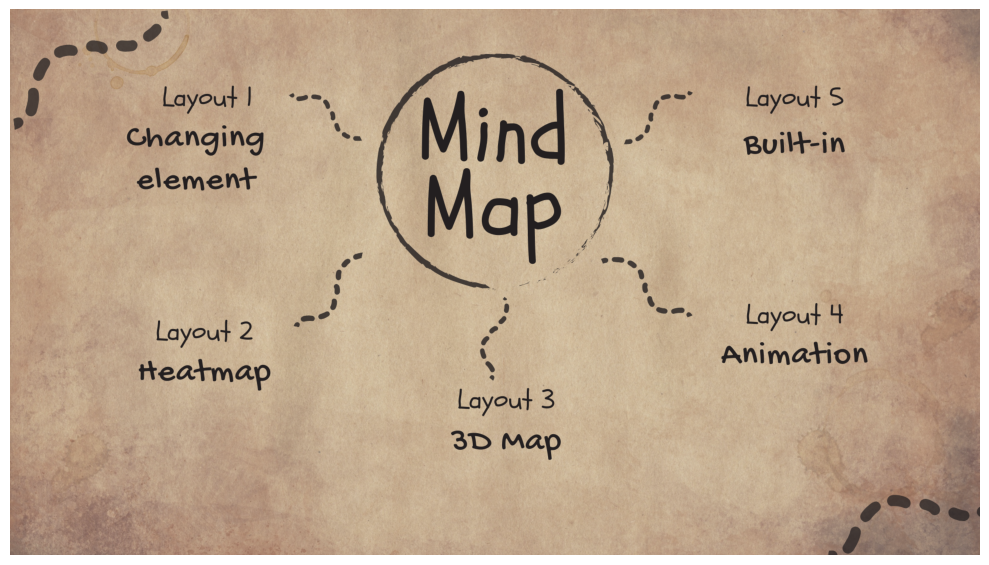

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and show image
img = mpimg.imread('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/images/Mindmap.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

<p style="color:Black; font-size: 18px; font-weight: bold"> Iteration 2: Data Wrangling</p>
First, I set up the notebook environment, load the data for quick overview and make sense of it.

In [3]:
import pandas as pd
import folium
from shapely.geometry import Point, Polygon

deaths_df = pd.read_csv('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/files/files_old_data/deaths.csv')
pumps_df = pd.read_csv('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/files/files_old_data/pumps.csv')
snowdates = pd.read_csv('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/files/files_old_data/snow_dates.csv')

deaths_df.head()

,death_count,x_latitude,y_longitude
0,1,51.513418,-0.137930
1,1,51.513418,-0.137930
2,1,51.513418,-0.137930
3,1,51.513361,-0.137883
4,1,51.513361,-0.137883


In [4]:
#Let's take a look at the shape of the dataset. Firstly, see numbers of death counts that have exact locations
deaths_df.shape

(489, 3)

In [5]:
#Identity numbers of pumps
pumps_df.shape

(8, 3)

In [6]:
#Identity total deaths in snowdates dataset
snowdates_death = snowdates['deaths'].sum()
print (snowdates_death)

616


<p style="color:Black; font-size: 15px; font-weight: bold"> ***Remark & Disclaimer: </p>
According to the above overview, numbers of deaths are different between "deaths.csv" and "snow_dates.csv" datasets, correspondingly, 489 and 616 deaths. This difference might affect the accuracy of maps and visuals. With that in mind, we run the current datasets.

In [7]:
# Create 'locations' variables by subsetting only Latitude and Longitude from the datasets
locations_deaths = deaths_df[['x_latitude', 'y_longitude']]
locations_pumps = pumps_df[['x_coordinate', 'y_coordinate']]

# Transform the dataframes to list of lists
deaths_list = locations_deaths[['x_latitude', 'y_longitude']].values.tolist()
pumps_list = locations_pumps[['x_coordinate', 'y_coordinate']].values.tolist()

<p style="color:Black; font-size: 18px; font-weight: bold"> Iteration 3: Results</p>
First and foremost, I would like to view the current Soho area negaviating actual latitude and longtitude of the Broad Street, nowing has become Broadwick Street.

In [8]:
# Create a map centered at a specific location
m = folium.Map(location=[51.51333282562678, -0.1368429489745336], zoom_start=18)
from IPython.display import display
display(m)

After that, I would like to see the exact positions of all the pumps in this area, using the blue markers, on top of the current Soho map.

In [9]:
m = folium.Map(location=[51.51333282562678, -0.1368429489745336], zoom_start=16)
for point in range(len(locations_pumps)):
    folium.Marker(pumps_list[point], popup=pumps_df['pump_name'][point]).add_to(m)
display (m)

To better visualize, I create a minimal basemap to layer locations of pumps and death counts effectively while avoiding visual clutter.

Instead of using standard blue markers for death counts, I explore a more interesting custom icon to illustrate each case: a human icon in red. This alternative practice would possibly enhance readers' engagement and empathy while effectively delivering the message.


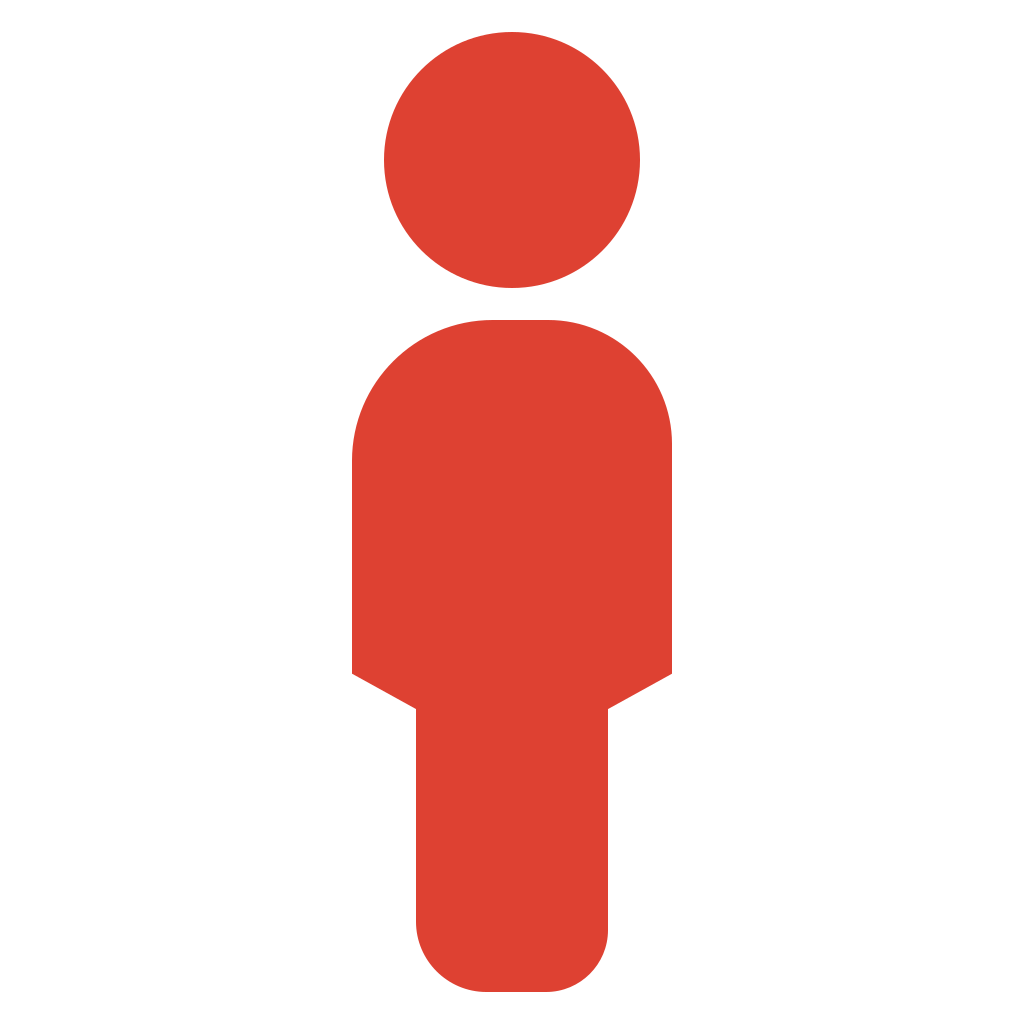

In [10]:
# (change "tile" to try a different background and folium marker to try different methods of representation)
map = folium.Map(location=[51.51333282562678, -0.1368429489745336], tiles='Cartodb Positron', zoom_start=16)

death_icon = folium.CustomIcon (icon_image='/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/images/6504470.png', icon_size=(20,30)) # Custom icon for death_count

for point in range(len(locations_deaths)):
    folium.Marker(deaths_list[point], icon=death_icon).add_to(map)
map1 = map

for point in range(len(locations_pumps)):
    folium.Marker(pumps_list[point], popup=pumps_df['pump_name'][point]).add_to(map1)

# Display the map
map1

After that, I use FastMarkerCluster in Folium to cluster the death counts for better visualization.
<p style="color:Black; font-size: 15px; font-weight: bold"> First layout: </p>
Snow's map redesign with human icons representing death counts, and light basemap that ehances readers' interaction and engagement.


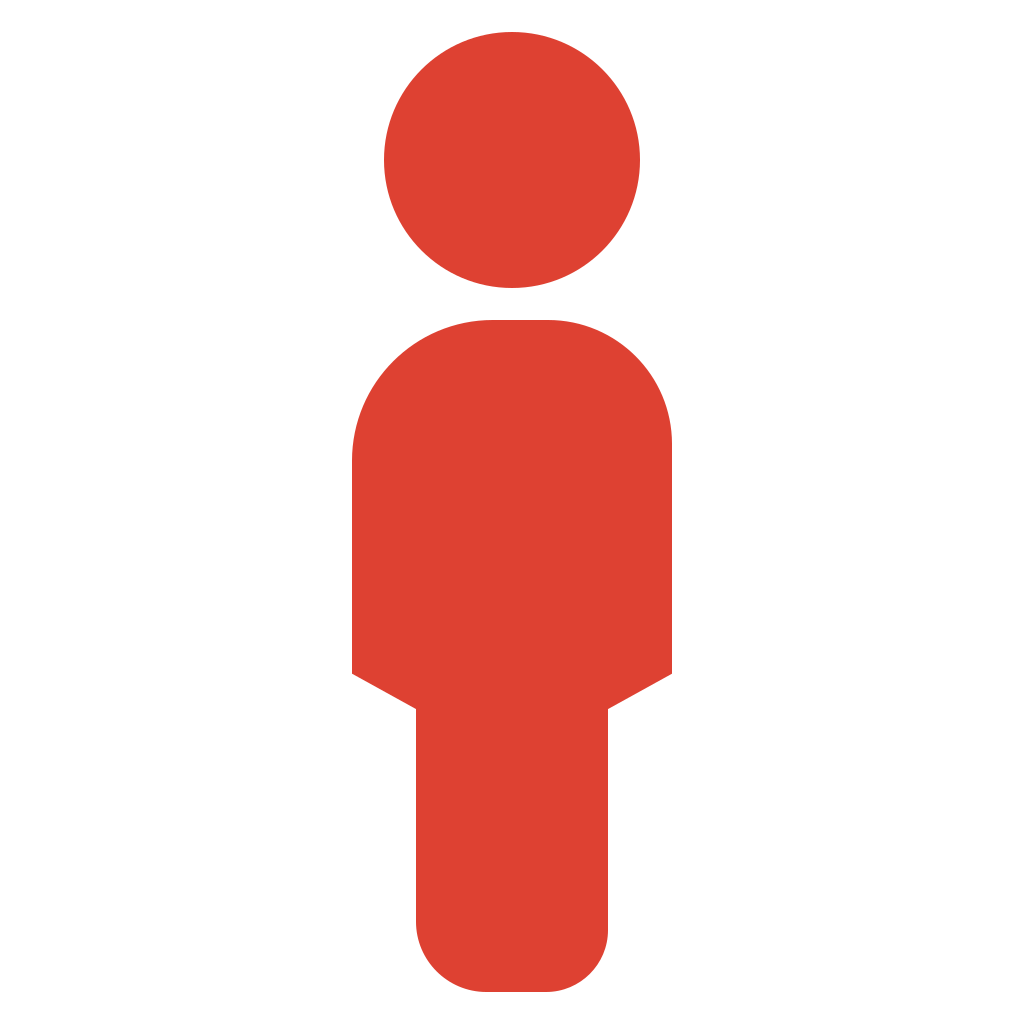

In [11]:
from folium.plugins import FastMarkerCluster
FastMarkerCluster(data=list(zip(deaths_df['x_latitude'].values, deaths_df['y_longitude'].values))).add_to(map)
folium.LayerControl().add_to(map)
map

<p style="color:Black; font-size: 15px; font-weight: bold"> Second layout: Heatmap </p>
I explore function to create heatmap in Folium. Initially, I picked the dark theme for the basemap; however, it gave the heaviness feel so I alternated with a light layer as a base. This layout is clear, effective enough without overpowering the heatmap. I then set the zoom start at 15 for better overview of the map. With this layout, we can clearly see the density, distribution of cases, graviating towards the Boardway pump.

In [12]:
base_map = folium.Map(location=[51.51333282562678, -0.1368429489745336], tiles='Cartodb Positron', zoom_start=15)

for i,row in pumps_df.iterrows():
    folium.Marker([row['x_coordinate'],row['y_coordinate']], popup=row['pump_name']).add_to(base_map)
base_map
heat_data = [[row['x_latitude'],row['y_longitude']] for index, row in locations_deaths.iterrows()]

from folium import plugins
from folium.plugins import HeatMap
HeatMap(heat_data).add_to(base_map)
base_map

<p style="color:Black; font-size: 15px; font-weight: bold"> Third layout: Using Plotly to create 3D visualization </p>
I yearn to view and understand the case from different point of view. How would it feel to be in the street of Soho, London at time of the incident? To be able to explore this perspective, I use Plotly to generate 3D visual that gives the data dimensions.

In [13]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter_3d(deaths_df, width = 800, height=800, x='x_latitude', y = 'y_longitude', z = 'death_count',
                   color='death_count', color_continuous_scale='Reds')
# Reduce marker size
fig.update_traces(marker=dict(size=5, opacity=0.8))

#Add water pumps
fig.add_trace(go.Scatter3d(
    x=pumps_df["x_coordinate"],
    y=pumps_df["y_coordinate"],
    z=[0] * len(pumps_df),
    mode="markers+text",
    marker=dict(size=10, color="blue", symbol="diamond"),
    text=pumps_df.get("pump_name", None),
    textposition="top center",
    name="Water Pumps"
))

fig.update_layout(
    scene=dict(
        xaxis_title="X Latitude (Longitude Approx)",
        yaxis_title="Y Long (Latitude Approx)",
        zaxis_title="Death Count",
        xaxis=dict(backgroundcolor="white", gridcolor="lightgray"),
        yaxis=dict(backgroundcolor="white", gridcolor="lightgray"),
        zaxis=dict(backgroundcolor="white", gridcolor="lightgray"),
    ),
    legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.05),
)
fig.update_layout(title="John Snow 1854 Cholera Outbreak — 3D")

fig.show()

The above visual provides us dimensions of pump locations and death counts, which orginally are geospatial data. A sense of connection and interaction between the datasets and audience is established. My further idea is to layer the 3D visual on the basemap; however, due to my limited knowledge of Python and coding, I am not able to do so in this assignment.

<p style="color:Black; font-size: 15px; font-weight: bold"> Fourth layout: Animation using Plotly</p>
To dive into another way of "better" John Snow's map, I explore animation technique to examine cases with regard to time. By simplifying complex datasets and combining them altogether, animation is effective due to its capacity of enhancing learning and information retention of the audience.

In [14]:
import pandas as pd
import plotly.express as px

#Load datasets again
deaths_df = pd.read_csv('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/files/files_old_data/deaths.csv')
pumps_df  = pd.read_csv('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/files/files_old_data/pumps.csv')
snow_dates = pd.read_csv('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/files/files_old_data/snow_dates.csv')

#Normalize column names again
#Print to confirm and adjust names if needed:
print("deaths_df columns:", deaths_df.columns.tolist())
print("pumps_df columns :", pumps_df.columns.tolist())
print("snow_dates columns:", snow_dates.columns.tolist())

#Try common alternate names:
if 'deaths' in snow_dates.columns and 'date' in snow_dates.columns:
    pass
elif 'death' in snow_dates.columns and 'date' in snow_dates.columns:
    snow_dates = snow_dates.rename(columns={'death':'deaths'})

#Ensure snow_dates['date'] is datetime
snow_dates['date'] = pd.to_datetime(snow_dates['date'])

#Expand deaths_df so each individual death is a row
if 'death_count' not in deaths_df.columns:
    raise ValueError("deaths.csv must contain a 'death_count' column if there is no per-death date.")

#Repeat each row by the number of deaths at that coordinate
expanded = deaths_df.loc[deaths_df.index.repeat(deaths_df['death_count'])].copy()
expanded = expanded.reset_index(drop=True)
expanded['death_id'] = expanded.index.astype(str)  # unique id per individual death

#Create a list of dates repeated by daily death counts from snow_dates
#Daily counts column is named 'deaths'
daily_counts = snow_dates.copy()
if 'deaths' not in daily_counts.columns:
    # Try common alternate column names:
    possible = [c for c in daily_counts.columns if 'death' in c.lower()]
    if possible:
        daily_counts = daily_counts.rename(columns={possible[0]:'deaths'})
    else:
        raise ValueError("snow_dates.csv must have a column of daily death counts (named 'deaths' or similar).")

daily_counts['deaths'] = daily_counts['deaths'].astype(int)

#Build date list
date_list = []
for _, row in daily_counts.iterrows():
    date_list.extend([row['date']] * int(row['deaths']))

#Check totals and align
total_expanded = len(expanded)
total_dates   = len(date_list)

if total_expanded != total_dates:
    print(f"WARNING: total deaths from deaths.csv (expanded) = {total_expanded}, "
          f"total from snow_dates daily sums = {total_dates}.")

#Cases:
if total_dates == total_expanded:
    # Perfect match — map 1-to-1 in order
    expanded['date'] = date_list
elif total_dates > total_expanded:
    # We have more date-slots than deaths. Assign first N dates, leave remaining dates with no deaths.
    print("More date-slots than death records — assigning earliest dates to deaths.")
    expanded['date'] = date_list[:total_expanded]
else:
    # More deaths than date-slots. We'll assign dates sequentially and then assign the last date to remaining deaths.
    print("Fewer date-slots than death records — assigning last available date to remaining deaths.")
    expanded['date'] = date_list + [daily_counts['date'].iloc[-1]] * (total_expanded - total_dates)

#Ensure datetime
expanded['date'] = pd.to_datetime(expanded['date'])

#Build cumulative-display DataFrame
#We want each frame (display_date) to include all deaths with death_date <= display_date.
unique_dates = sorted(daily_counts['date'].unique())

#Convert unique_dates to a DataFrame
dates_df = pd.DataFrame({'display_date': unique_dates})

#Cross join expanded (each individual death) with display dates, then filter
expanded['_key'] = 1
dates_df['_key'] = 1
cross = pd.merge(expanded, dates_df, on='_key').drop(columns=['_key'])

#Keep rows where the death has already occurred by display_date (cumulative)
cumulative = cross[cross['date'] <= cross['display_date']].copy()

#For animation, Plotly prefers the animation column to be string-like; convert:
cumulative['display_date_str'] = cumulative['display_date'].dt.strftime('%Y-%m-%d')

#Plot animated scatter (cumulative)
fig = px.scatter(
    cumulative,
    x='x_latitude',
    y='y_longitude',
    animation_frame='display_date_str',
    animation_group='death_id',   # keep identity across frames
    hover_name='death_id',
    title='Cumulative Animated Cholera Deaths in Soho, London (1854)',
    labels={'x_latitude': 'Longitude (approx)', 'y_longitude': 'Latitude (approx)', 'display_date_str': 'Date'},
    height=800,
    width=900,
    range_x=[expanded['x_latitude'].min() - 0.002, expanded['x_latitude'].max() + 0.002],
    range_y=[expanded['y_longitude'].min() - 0.002, expanded['y_longitude'].max() + 0.002]
)

#Add static pump markers (they'll appear on top of frames)
#Try multiple column name possibilities for pumps
xcol = 'x_coordinate' if 'x_coordinate' in pumps_df.columns else (pumps_df.columns[0])
ycol = 'y_coordinate' if 'y_coordinate' in pumps_df.columns else (pumps_df.columns[1] if len(pumps_df.columns)>1 else pumps_df.columns[0])

fig.add_scatter(
    x=pumps_df[xcol],
    y=pumps_df[ycol],
    mode='markers+text',
    marker=dict(size=14, symbol='triangle-up'),
    text=pumps_df.index.astype(str),
    textposition='top center',
    name='Pumps'
)

fig.update_traces(marker=dict(size=6, opacity=0.8), selector=dict(mode='markers'))
fig.update_layout(
    title_font_size=18,
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

deaths_df columns: ['death_count', 'x_latitude', 'y_longitude']
pumps_df columns : ['pump_name', 'x_coordinate', 'y_coordinate']
snow_dates columns: ['order', 'date', 'attacks', 'deaths']
More date-slots than death records — assigning earliest dates to deaths.


With regard to time, especially from from 01-Sep-1854 to 08-Sep-1854, numbers of deaths rose. From 08-Sep-1854 onwards, after removal of Broad street pump's handle, cases gradually decreased to 0. The animated circles delivers the message of exponential growth of death counts throughout short period of time, which also provokes audience's strong connection and empathy.

<p style="color:Black; font-size: 15px; font-weight: bold"> Fifth layout: Embedding subplots to the original map</p>
The idea is that instead of redesigning Snow's map totally, we can add subplots to supplement and explain the data.

In [15]:
#Using "snow_dates.csv"

import pandas as pd
import plotly.express as px

# Load the dataset again
snow_dates = pd.read_csv('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/files/files_old_data/snow_dates.csv')

# Check the column names
print(snow_dates.head())

# Instead of manually renaming columns, let's see what columns we actually have
print("Column names:", snow_dates.columns.tolist())

# Convert to datetime
date_column = 'date'
snow_dates[date_column] = pd.to_datetime(snow_dates[date_column])

# Sort by date just in case
snow_dates = snow_dates.sort_values(date_column)

# Assuming 'deaths' is the correct column name for deaths data
deaths_column = 'deaths'

# Cumulative deaths
snow_dates['cumulative_deaths'] = snow_dates[deaths_column].cumsum()

# Plot daily deaths
fig1 = px.line(
    snow_dates,
    x=date_column,
    y=deaths_column,
    title='Daily Cholera Deaths in Soho (1854)',
    labels={date_column: 'Date', deaths_column: 'Number of Deaths'},
    markers=True
)
fig1.show()

# Plot cumulative deaths
fig2 = px.line(
    snow_dates,
    x=date_column,
    y='cumulative_deaths',
    title='Cumulative Cholera Deaths in Soho (1854)',
    labels={date_column: 'Date', 'cumulative_deaths': 'Cumulative Deaths'},
    markers=True
)
fig2.show()

   order        date  attacks  deaths
0      1  1854-08-19        1       1
1      2  1854-08-20        1       0
2      3  1854-08-21        1       2
3      4  1854-08-22        0       0
4      5  1854-08-23        1       0
Column names: ['order', 'date', 'attacks', 'deaths']


Using canva, I add the line graphs to the original, load then show the image as layout 5. This so-called "redesign" adds more information without changing any elements, keeping the original original.

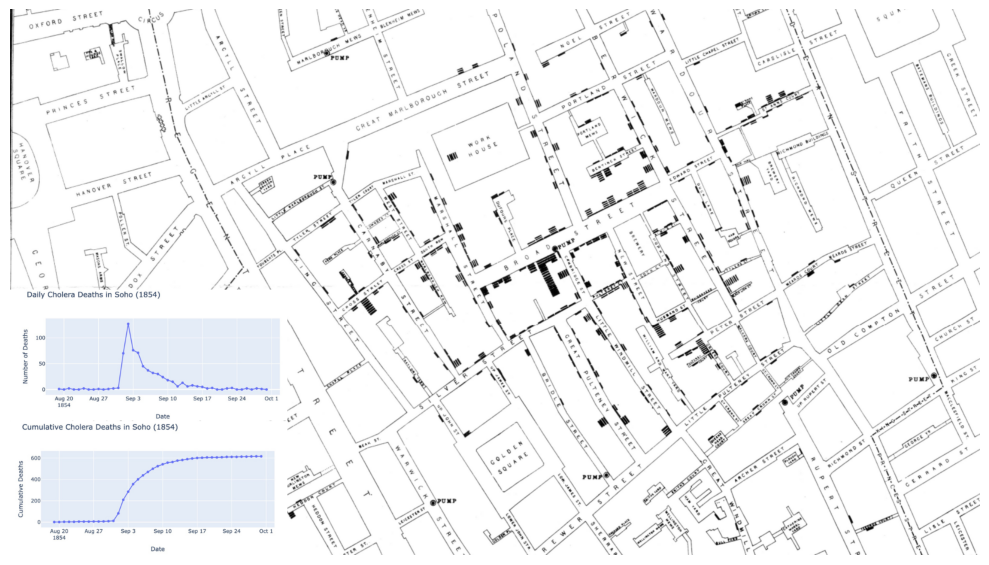

In [16]:
# Load and show image
img = mpimg.imread('/content/drive/MyDrive/Visualization/RedesignGraphic_Snow/images/Layout 5.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()

<p style="color:Black; font-size: 15px; font-weight: bold"> Conclusion</p>
In conclusion, above layouts are several ideas ones might explore to redesign a notable information graphic. To some extent, data visualization critic does not "criticize" others' work, but rather "better" the works. To another extent, the process of redesign by implementing modern techniques encourages visability and accessibility of the historical works to younger generations. It is such an honor that we now have the opportunity, and the ability, to do so.